Clear project data

Include  packages

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:

pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 7.2 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 17.4 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer #scikit-learn


Load data

In [3]:
data = pd.read_csv('./data/rawTrain.csv')

Show data

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Verify structure

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Stadistics

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Get objects

In [9]:
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
data.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


visualise size dataset

In [11]:
data.shape

(891, 12)

In [ ]:
# Convert Pclass to category(kind string), more efficient to best performance
data['Pclass'] = data['Pclass'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 77.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Finding Outliers - Using graphics

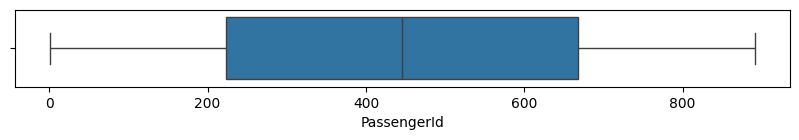

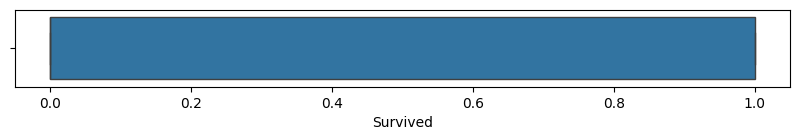

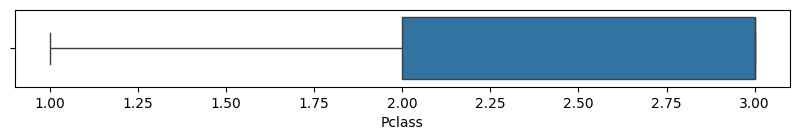

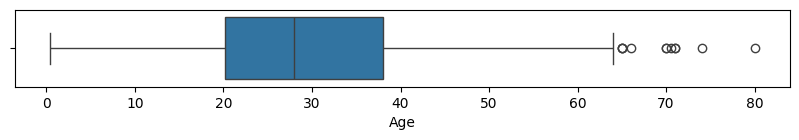

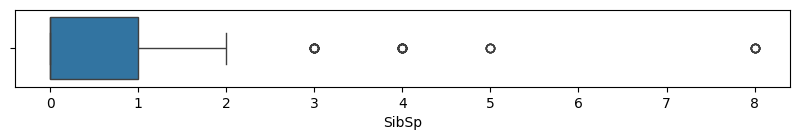

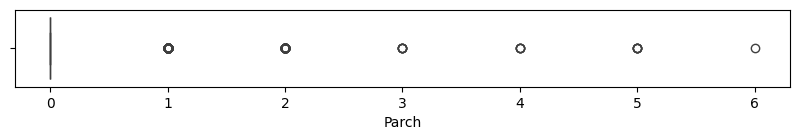

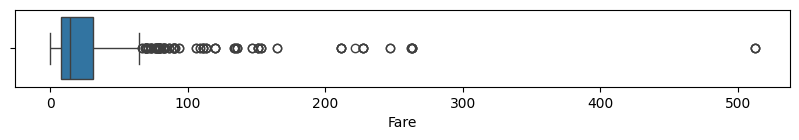

In [12]:
# number are including all the columns with numeric data
cols = data.select_dtypes(include=['number']).columns

for column in cols:
  plt.figure(figsize=(10, 1))
  sns.boxplot(data=data[cols], x=column)


Outliers - Calc

IRQ = rango interquartilico

----Q1(25%)----Q2(50%)----Q3(75%)----

In [ ]:
outliers = {}

for col in cols:
  Q1 = np.percentile(data[col], 25)
  Q3 = np.percentile(data[col], 75)
  # Take Q2 && Q3
  IRQ = Q3 - Q1
  # Calculate the limits
  lower_limit = Q1 - 1.5 * IRQ
  upper_limit = Q3 + 1.5 * IRQ
  # Find outliers
  outliers[col] = data[col][(data[col] < lower_limit) | (data[col] > upper_limit)]
  print(f'{col}: {len(outliers[col])
  }')



PassengerId: 0
Survived: 0
Age: 0
SibSp: 46
Parch: 213
Fare: 116


Desviación standar

In [13]:
# Desviación standar
outliers2 = {}

for col in cols:
  mean = data[col].mean()
  std = data[col].std()
  # Calculate the limits
  lower_limit = mean - 3 * std
  upper_limit = mean + 3 * std
  # Find outliers
  outliers2[col] = data[col][(data[col] < lower_limit) | (data[col] > upper_limit)]
  print(f'{col}: {len(outliers2[col])}')







PassengerId: 0
Survived: 0
Pclass: 0
Age: 2
SibSp: 30
Parch: 15
Fare: 20


<Axes: xlabel='Fare', ylabel='Count'>

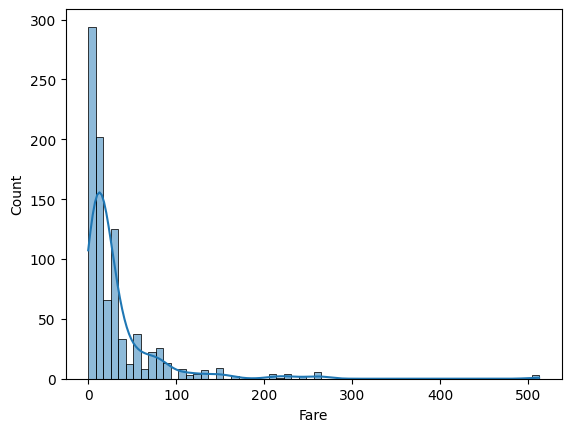

In [14]:
sns.histplot(data=data, x='Fare', kde=True)

<Axes: xlabel='Age', ylabel='Count'>

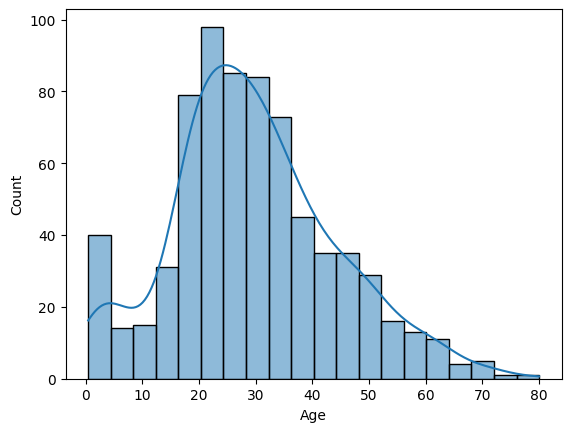

In [15]:
sns.histplot(data=data, x='Age', kde=True)

Validate null values with .isna()

In [16]:
data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Count null values

In [ ]:
# Count the number of missing values (NaN) in each column of the dataframe
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Delete null values

In [12]:
# inplace=True to modify the original dataframe
# inplace=False to create a new dataframe
# example:
# data_new = data.drop('Cabin', axis=1, inplace=False)

# axis=1 to drop the column
# axis=0 to drop the row
data.drop('Cabin', axis=1, inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Impute data

In [19]:
impute = SimpleImputer(strategy='median')

print('Initial median: ', data['Age'].median())

output = impute.fit_transform(data[['Age']])
output = pd.DataFrame(output)

print('\nNull into new dataframe: ', output.isna().sum())
print('\nMedian for new dataframe: ', output.median())

Initial median:  28.0

Null into new dataframe:  0    0
dtype: int64

Median for new dataframe:  0    28.0
dtype: float64


In [20]:
impute = SimpleImputer(strategy='constant', fill_value='S')

print('Initial median: ', data['Embarked'].value_counts())

output = impute.fit_transform(data[['Embarked']])
output = pd.DataFrame(output)

print('\nNull into new dataframe: ', output.isna().sum())
print('\nMedian for new dataframe: ', output.value_counts())

Initial median:  Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Null into new dataframe:  0    0
dtype: int64

Median for new dataframe:  0
S    646
C    168
Q     77
Name: count, dtype: int64


In [28]:
# Varianza en los datos
data.select_dtypes(include='number').var()
# data.var() return error because any of the column with string values are string with numbers, then do above

PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              211.019125
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
dtype: float64

In [30]:
# Varianza en los datos
numcols = data.select_dtypes(include='number').columns

for c in numcols:
  print(data[c].value_counts)

<bound method IndexOpsMixin.value_counts of 0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64>
<bound method IndexO

<Axes: >

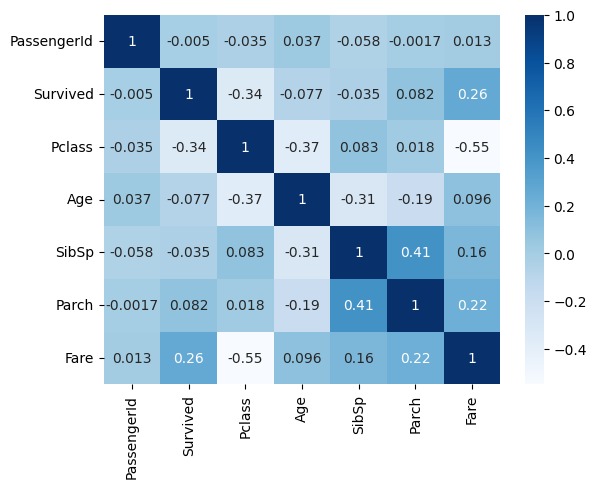

In [ ]:
# See the coheficiente de pearson
num_cols = data.select_dtypes(include = "number").columns
matriz = data[num_cols].corr()
sns.heatmap(matriz, annot = True, cmap = "Blues")


Visualización para la columna PassengerId


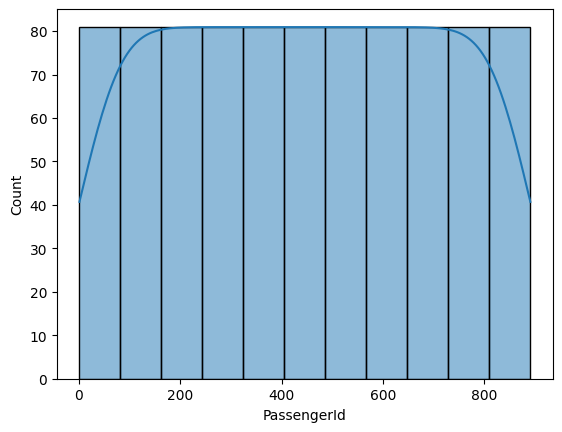

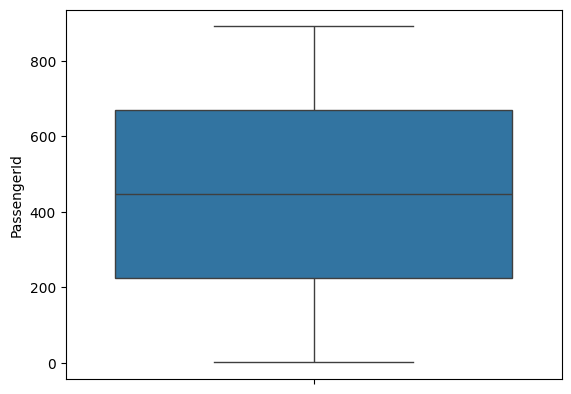


Visualización para la columna Survived


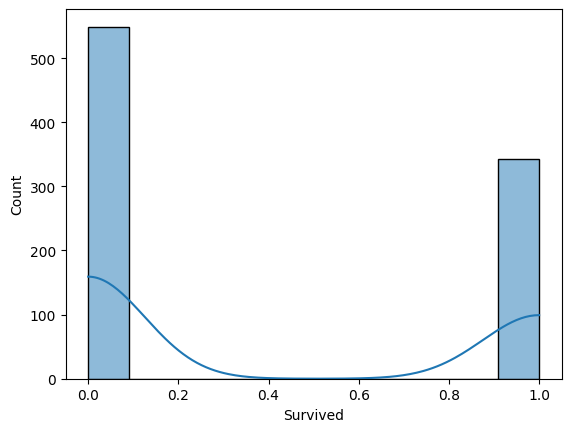

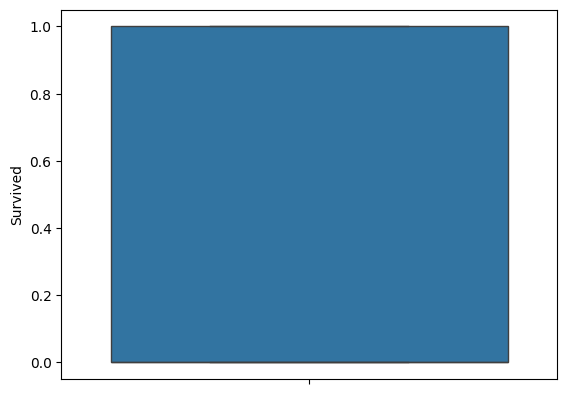


Visualización para la columna Pclass


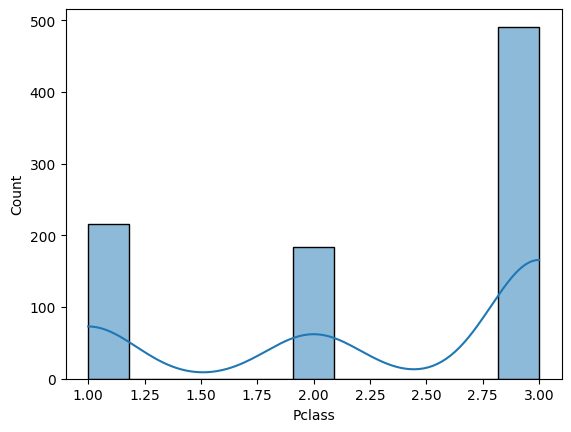

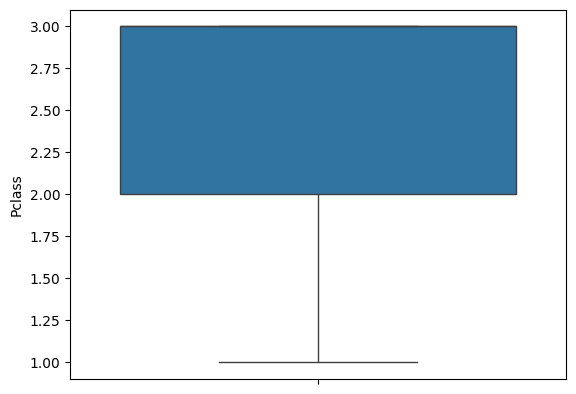


Visualización para la columna Age


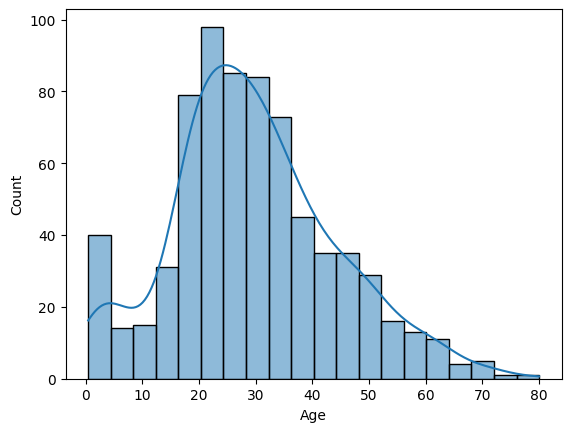

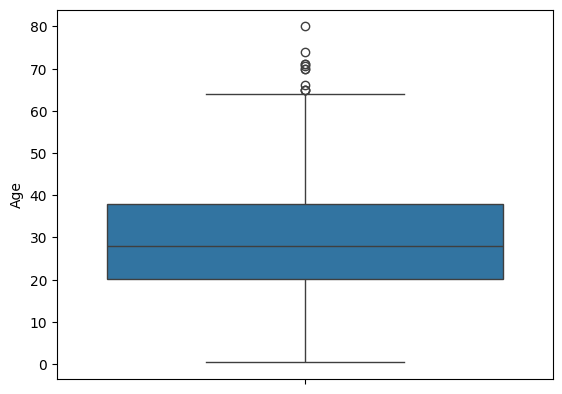


Visualización para la columna SibSp


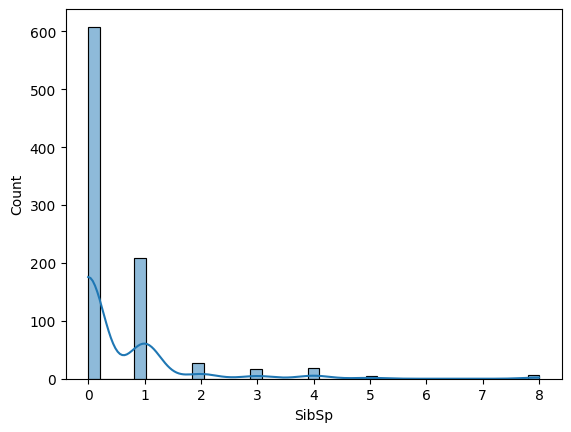

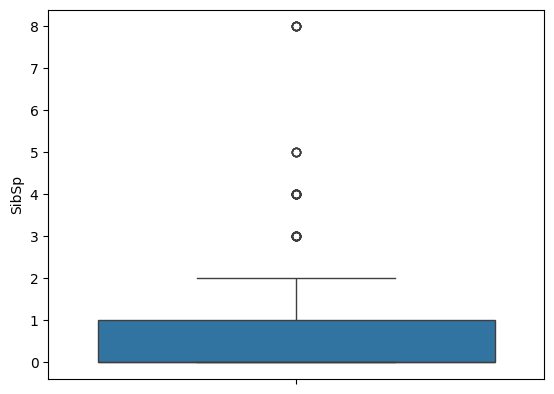


Visualización para la columna Parch


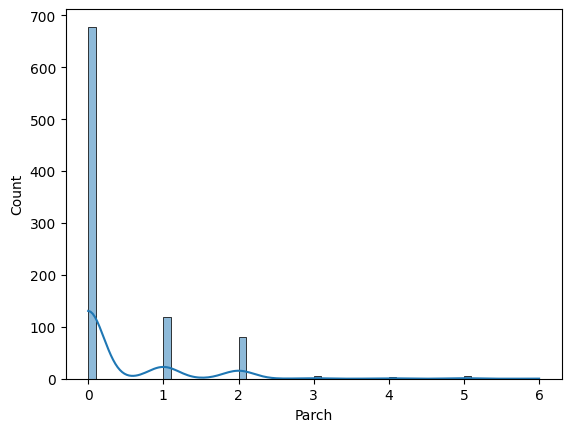

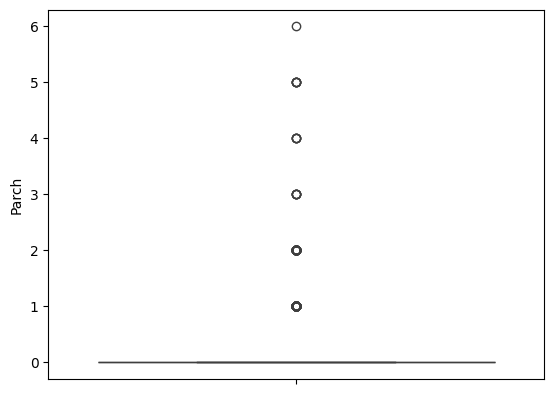


Visualización para la columna Fare


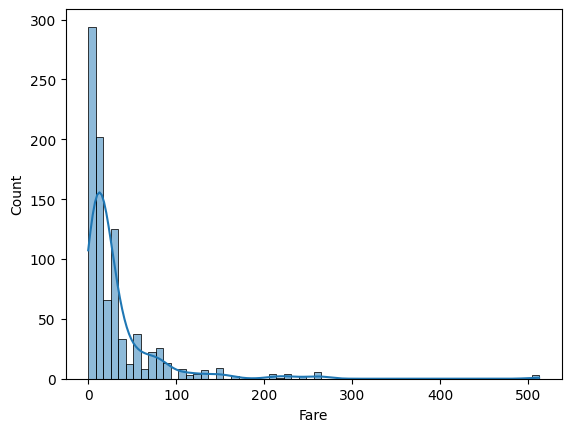

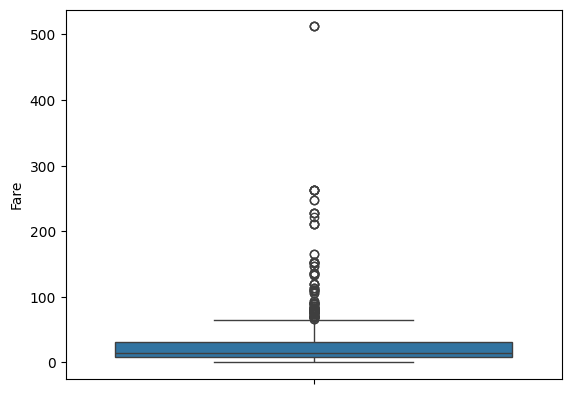

In [34]:
# Visual explore
for col in num_cols:
  print('\nVisualización para la columna', col)
  sns.histplot(data[col], kde = True)
  plt.show()
  sns.boxplot(data[col])
  plt.show()
  